# Predicting Hepatitis on patients using Machine Learning

In this project, we'll work with the Hepatitis data set from UCI Machine Learning Repository, indicating whether the patient is alive or dead.
We'll use a Logistic regression model based on his/her features, to predict the health of the patient.

In [74]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.metrics import geometric_mean_score
import matplotlib.pyplot as plt
import seaborn as sns

## Data

The data set has this following features:

- CLASS: die, live
- AGE: 10, 20, 30, 40, 50, 60, 70, 80
- SEX: male, female
- STEROID: no, yes
- ANTIVIRALS: no, yes
- FATIGUE: no, yes
- MALAISE: no, yes
- ANOREXIA: no, yes
- LIVER BIG: no, yes
- LIVER FIRM: no, yes
- SPLEEN PALPABLE: no, yes
- SPIDERS: no, yes
- ASCITES: no, yes
- VARICES: no, yes
- BILIRUBIN: 0.39, 0.80, 1.20, 2.00, 3.00, 4.00
- ALK PHOSPHATE: 33, 80, 120, 160, 200, 250
- SGOT: 13, 100, 200, 300, 400, 500,
- ALBUMIN: 2.1, 3.0, 3.8, 4.5, 5.0, 6.0
- PROTIME: 10, 20, 30, 40, 50, 60, 70, 80, 90
- HISTOLOGY: no, yes 

In [75]:
data = pd.read_csv("../Data/hepatitis.data", na_values='?')

In [76]:
data.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,abumin,protime,histology
0,2,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,2,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,2,31,1,NaN,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,2,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
class              155 non-null int64
age                155 non-null int64
sex                155 non-null int64
steroid            154 non-null float64
antivirals         155 non-null int64
fatigue            154 non-null float64
malaise            154 non-null float64
anorexia           154 non-null float64
liver_big          145 non-null float64
liver_firm         144 non-null float64
spleen_palpable    150 non-null float64
spiders            150 non-null float64
ascites            150 non-null float64
varices            150 non-null float64
bilirubin          149 non-null float64
alk_phosphate      126 non-null float64
sgot               151 non-null float64
abumin             139 non-null float64
protime            88 non-null float64
histology          155 non-null int64
dtypes: float64(15), int64(5)
memory usage: 24.3 KB


In [78]:
data.describe()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,abumin,protime,histology
count,155.000000,155.000000,155.000000,154.000000,155.000000,154.000000,154.000000,154.000000,145.000000,144.000000,150.00000,150.000000,150.000000,150.00000,149.000000,126.000000,151.00000,139.000000,88.000000,155.000000
mean,1.793548,41.200000,1.103226,1.506494,1.845161,1.350649,1.603896,1.792208,1.827586,1.583333,1.80000,1.660000,1.866667,1.88000,1.427517,105.325397,85.89404,3.817266,61.852273,1.451613
std,0.406070,12.565878,0.305240,0.501589,0.362923,0.478730,0.490682,0.407051,0.379049,0.494727,0.40134,0.475296,0.341073,0.32605,1.212149,51.508109,89.65089,0.651523,22.875244,0.499266
min,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,0.300000,26.000000,14.00000,2.100000,0.000000,1.000000
25%,2.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.00000,1.000000,2.000000,2.00000,0.700000,74.250000,31.50000,3.400000,46.000000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.00000,1.000000,85.000000,58.00000,4.000000,61.000000,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.00000,1.500000,132.250000,100.50000,4.200000,76.250000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.00000,8.000000,295.000000,648.00000,6.400000,100.000000,2.000000


<BarContainer object of 2 artists>

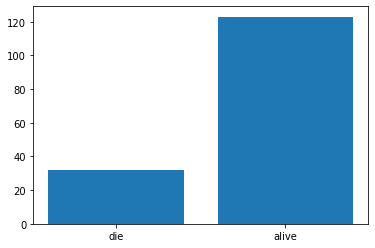

In [79]:
c1 = data[data['class']==1].shape[0]
c2 = data[data['class']==2].shape[0]

x = ['die', 'alive']
y = np.array([c1, c2])
plt.bar(x, y)

We can see that the data set is imbalanced.

## Data Cleaning


In [80]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending=False)
    per1 = data.isnull().sum()/ data.isnull().count() * 100
    per2 = (round(per1, 1)).sort_values(ascending=False)
    missing_data = pd.concat([total, per2], axis=1, keys=['Total', '%'])
    return missing_data[:5]

In [81]:
missing_data(data)

,Total,%
protime,67,43.2
alk_phosphate,29,18.7
abumin,16,10.3
liver_firm,11,7.1
liver_big,10,6.5


We have a choice between 3 options:
    1. Drop the columns.
    2. Fill with the mean/median.
    3. Use sklearn's Imputer method.

Right now, we know that around the half of protime data are missing values. That's a lot. So I think, it'll be better to drop the column.

In [82]:
data = data.drop('protime', axis=1)

For the other missing values, we'll use KNNImputer.

In [83]:
KNNImputer = KNNImputer()

In [84]:
data = KNNImputer.fit_transform(data)

In [85]:
X = data[:, 1:-1]
y = data[:, 0]

## Model Building

Let's use SMOTE to fix the imbalancement.

In [86]:
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.15, random_state=0)

Let's first try our models without special parameters, just to see the accuracy of the original algorithm on our data set.

In [88]:
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)
dt_score = dt.score(X_test, y_test)

svc = SVC(random_state=0)
svc.fit(X_train, y_train)
svc_score = svc.score(X_test, y_test)

rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)
rf_score = rf.score(X_test, y_test)

In [89]:
models = {'Decision Tree': dt_score, 'SVC': svc_score, 'Random Forest': rf_score}

for name, model in models.items():
    print('Accuracy of', name, ':', round(model, 2))

Accuracy of Decision Tree : 0.84
Accuracy of SVC : 0.46
Accuracy of Random Forest : 0.89


We can see that Decision Tree and Random Forest performes better than the SVC, so we should continue with these two.

GridSearchCV gives us the best parameters for our model to perform on the training set. Let's apply them to our algorithm.

In [90]:
# params = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 5)],
#           'max_features': ['auto', 'sqrt'],
#           'max_depth': [int(x) for x in np.linspace(10, 110, num = 5)],
#           'min_samples_split': [2, 5, 10],
#           'min_samples_leaf': [1, 2, 4],
#           'bootstrap': [True, False]}

# gs = GridSearchCV(rf, params, cv=5)
# gs.fit(X_train, y_train)
# gs.best_params_

# -> {bootstrap=True,
#    max_depth=10,
#    max_features='auto',
#    min_samples_leaf=2,
#    min_samples_split=10,
#    n_estimators=200}

In [91]:
rf = RandomForestClassifier(bootstrap=True,
                            max_depth= 10,
                            max_features='auto',
                            min_samples_leaf= 2,
                            min_samples_split= 10,
                            n_estimators=200,
                            oob_score=True,
                            random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=True, random_state=0, verbose=0,
                       warm_start=False)

In [92]:
# params = {'criterion': ['gini', 'entropy'],
#           'max_depth': np.arange(1,20)} 

# gs = GridSearchCV(dt, params, cv=5)
# gs.fit(X_train, y_train)
# gs.best_params_


# -> {'criterion'='gini',
#      max_depth=8}

In [93]:
dt = DecisionTreeClassifier(criterion='gini',
                            max_depth=8,
                            random_state=0)

dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [94]:
predictions_rf = rf.predict(X_test)
predictions_dt = dt.predict(X_test)

In [95]:
for i in range(5):
    print("X:", list(X_test[i, :]))
    print("y:", y_test[i])
    print("RF y_hat:", round(predictions_rf[i], 2))
    print("DT y_hat:", round(predictions_dt[i], 2))
    print('\n')

X: [38.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 0.6, 76.0, 18.0, 4.4]
y: 2.0
RF y_hat: 2.0
DT y_hat: 2.0


X: [54.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 1.0, 155.0, 225.0, 3.6]
y: 2.0
RF y_hat: 2.0
DT y_hat: 2.0


X: [50.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.5, 100.0, 100.0, 5.3]
y: 2.0
RF y_hat: 2.0
DT y_hat: 2.0


X: [33.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 2.0, 0.7, 63.0, 80.0, 3.0]
y: 1.0
RF y_hat: 2.0
DT y_hat: 2.0


X: [34.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0, 2.0, 2.0, 2.8, 127.0, 182.0, 3.7]
y: 1.0
RF y_hat: 1.0
DT y_hat: 1.0




In [96]:
accuracy_dt = dt.score(X_test, y_test)
print('Oob score of RF:', rf.oob_score_)
print('Accuracy of DT:', accuracy_dt)

Oob score of RF: 0.8899521531100478
Accuracy of DT: 0.8378378378378378


In [97]:
print("--- Random Forest Predictions Analysis ---")
print("Classification Report:")
print(classification_report(y_test,predictions_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions_rf))
print("Geometric Mean Score:")
print(round(geometric_mean_score(y_test, predictions_rf), 2))
print()
print("--- Decision Tree Predictions Analysis ---")
print("Classification Report:")
print(classification_report(y_test,predictions_dt))
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions_dt))
print("Geometric Mean Score:")
print(round(geometric_mean_score(y_test, predictions_dt), 2))

--- Random Forest Predictions Analysis ---
Classification Report:
              precision    recall  f1-score   support

         1.0       0.89      0.89      0.89        19
         2.0       0.89      0.89      0.89        18

    accuracy                           0.89        37
   macro avg       0.89      0.89      0.89        37
weighted avg       0.89      0.89      0.89        37

Confusion Matrix:
[[17  2]
 [ 2 16]]
Geometric Mean Score:
0.89

--- Decision Tree Predictions Analysis ---
Classification Report:
              precision    recall  f1-score   support

         1.0       0.88      0.79      0.83        19
         2.0       0.80      0.89      0.84        18

    accuracy                           0.84        37
   macro avg       0.84      0.84      0.84        37
weighted avg       0.84      0.84      0.84        37

Confusion Matrix:
[[15  4]
 [ 2 16]]
Geometric Mean Score:
0.84


Our Random Forest Algorithm made around 90% of accuracy on the geometric mean score, the Decision Tree is not far behind but it's less regular.